<a href="https://colab.research.google.com/github/anmolbadhan13/big_mart_sales-prediction/blob/main/bigmart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
df=pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Categorical features :**
- Item_Identifier
-  Item_Fat_Content
-Item_Type
- Outlet_Identifier
-Outlet_Size  
- Outlet_Location_Type
-Outlet_Type




In [ ]:
# checking for missising values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing values

Mean--> average value

MOde--> Most repeated value

In [ ]:
# [1,2,3,4,4,5,4,6]
# # mean=1+2+3+4+4+5+4+6
# # mode=4 --> most repeated value

In [ ]:
# mean value of item weight column
df['Item_Weight'].mean()


12.857645184135976

In [ ]:
# filling missing values in item_weight column with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing value in Outlet_Size  with mode

In [ ]:
mode=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [ ]:
mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
missing_values=df['Outlet_Size'].isnull()

In [ ]:
missing_values  # True-->absent
                # false-->present

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [ ]:
df.loc[missing_values,'Outlet_Size']=df.loc[missing_values,'Outlet_Type'].apply(lambda x:mode[x])

In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**data analysis**

In [ ]:
# stats of df
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical features

In [ ]:
sns.set()

<ipython-input-18-0b2c5b48a31e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


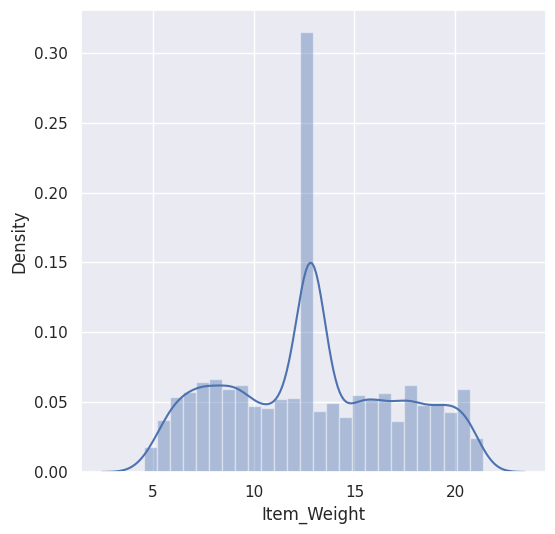

In [ ]:
# item weight_distribbution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

<ipython-input-19-a3a94a13f5ab>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


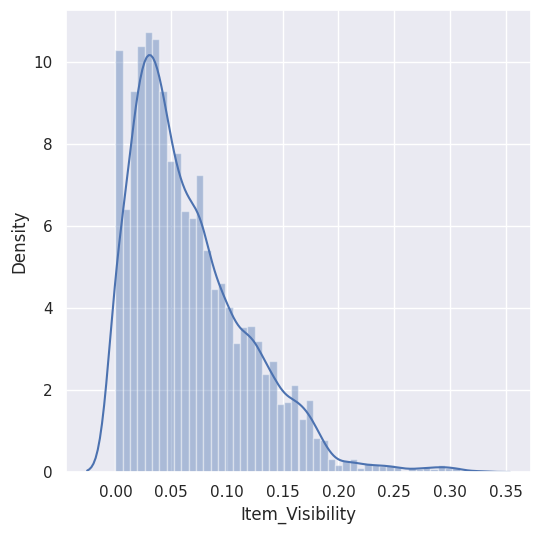

In [ ]:
# Item_Visibility_distribbution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

<ipython-input-20-2677240c8118>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


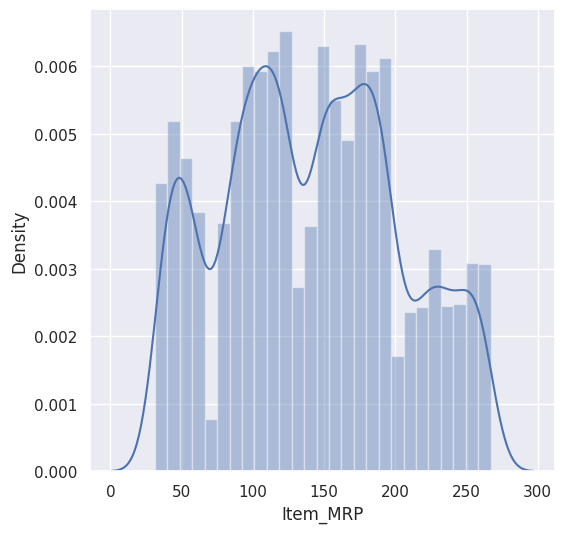

In [ ]:
# Item_MRP_distribbution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

<ipython-input-21-aaf3ae3b013e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


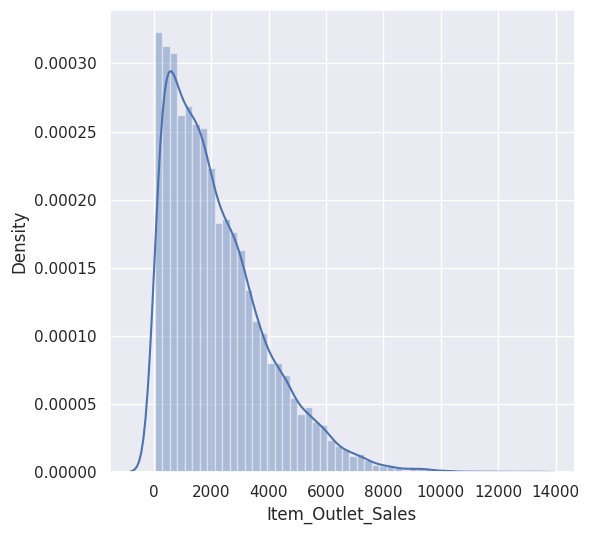

In [ ]:
# Item_Outlet_Sales_distribbution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

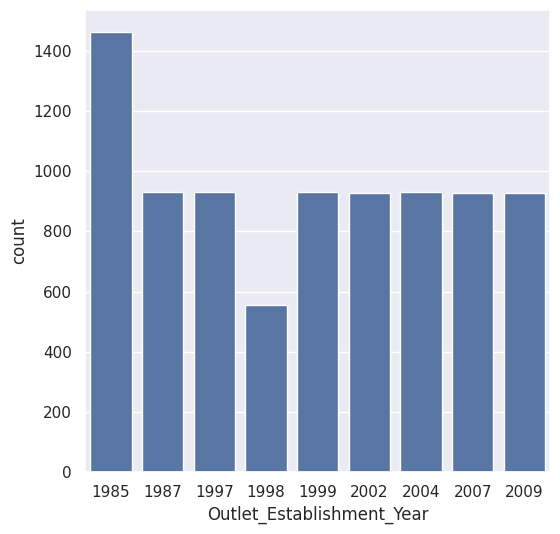

In [ ]:
#Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.show()

Categorical features

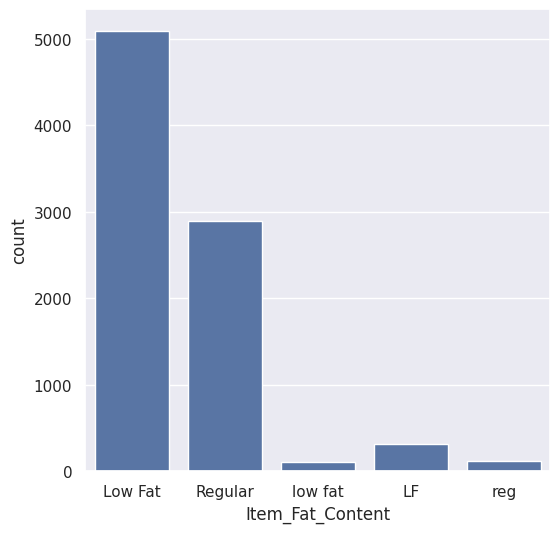

In [ ]:
#Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=df)
plt.show()

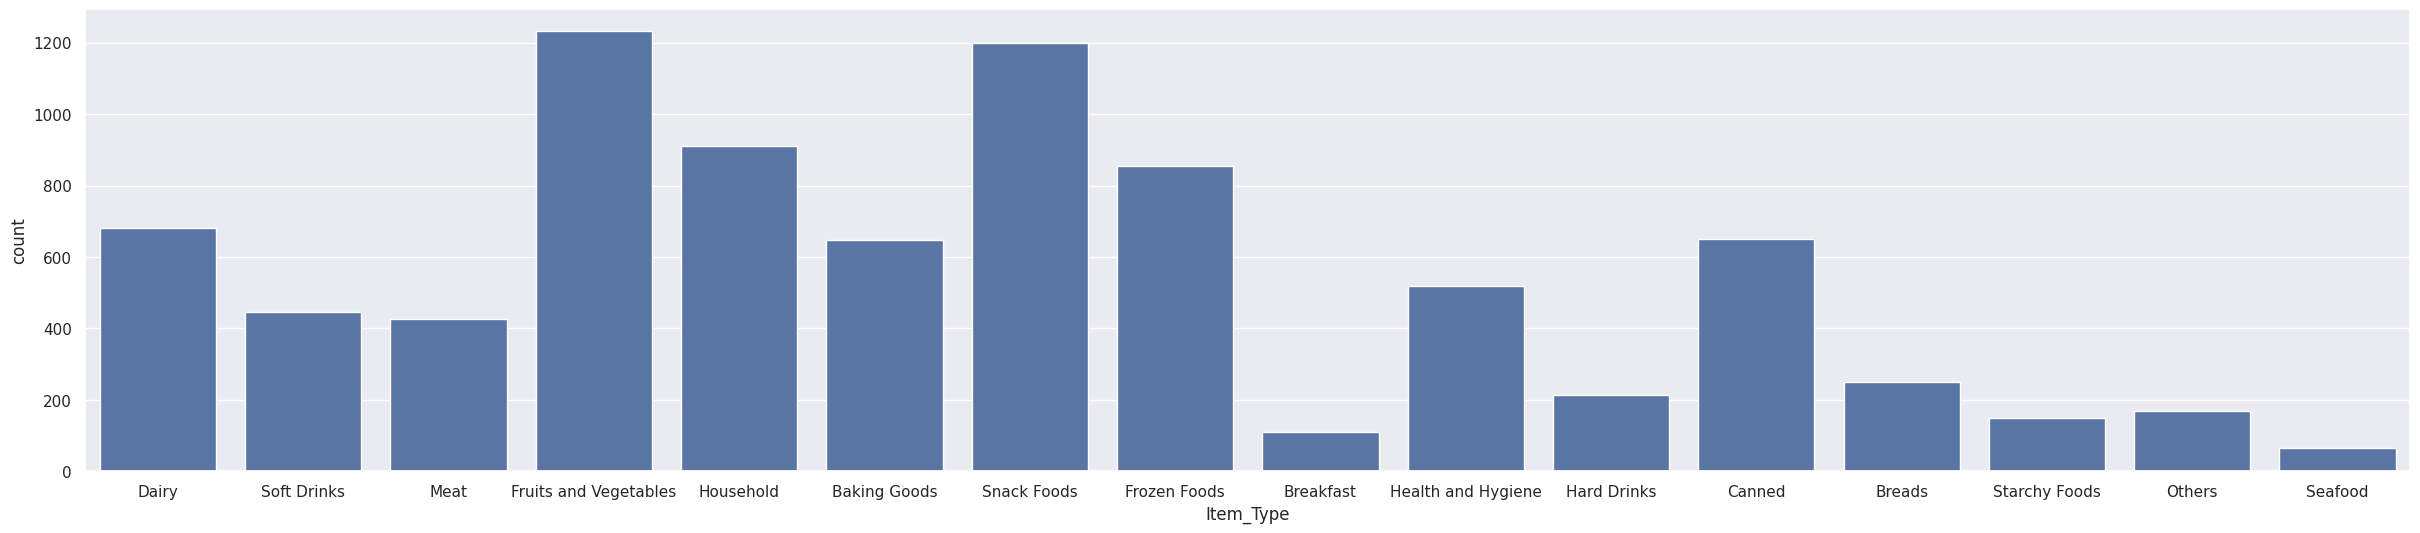

In [ ]:
#Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=df)
plt.show()

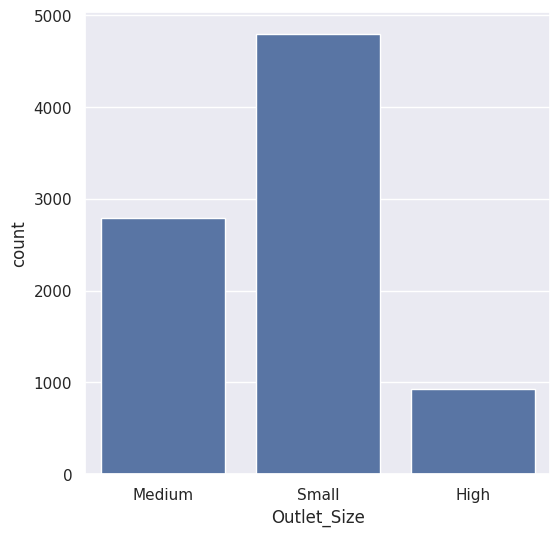

In [ ]:
#Outlet_Size  column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=df)
plt.show()

In [ ]:
# correlation=df.corr()


In [ ]:
# plt.figure(figsize=(6,6))
# sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
# plt.show()

Data preprocessing

In [ ]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [ ]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

**Outlier detection**

In [ ]:
categorical_features=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
continous_features=[ feature for feature in df.columns if feature not in categorical_features]

Q1 = df[continous_features].quantile(0.25) #Calculate the first quartile (25th percentile)
Q3 = df[continous_features].quantile(0.75)#third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers_count = ((df[continous_features] < (Q1 - 1.5 * IQR)) | (df[continous_features] > (Q3 + 1.5 * IQR))).sum()
outliers_count

Item_Weight                    0
Item_Visibility              144
Item_MRP                       0
Outlet_Establishment_Year      0
Item_Outlet_Sales            186
dtype: int64

To handle outliers
iam using (Cap Outliers)-This method caps the outliers to the lower and upper bounds.
Cap Outliers: This method preserves all data points while reducing the impact of extreme values. It's a good balance between removing outliers and keeping the data intact.
Cap Outliers: Adjust values that fall outside the bounds to the nearest bound.



In [ ]:
# Cap outliers
df_capped = df.copy()
for feature in continous_features:
    df_capped[feature] = np.where(df_capped[feature] < lower_bound[feature], lower_bound[feature], df_capped[feature])
    df_capped[feature] = np.where(df_capped[feature] > upper_bound[feature], upper_bound[feature], df_capped[feature])

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after capping outliers: {df_capped.shape}")

Original dataset shape: (8523, 12)
Dataset shape after capping outliers: (8523, 12)


Item_Fat_Content or Item_Type do not have a natural order there for wil go under one hot encoding

In [ ]:
df_capped=pd.get_dummies(df_capped, columns=['Item_Fat_Content','Item_Type'], drop_first=True)

In [ ]:
df_capped.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,0.016047,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,...,False,False,False,False,False,False,False,False,False,False
1,DRC01,5.92,0.019278,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,...,False,False,False,False,False,False,False,False,True,False
2,FDN15,17.50,0.016760,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,...,False,False,False,False,True,False,False,False,False,False
3,FDX07,19.20,0.000000,182.0950,OUT010,1998.0,Small,Tier 3,Grocery Store,732.3800,...,True,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0.000000,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,...,False,False,False,True,False,False,False,False,False,False


label encoding

In [ ]:
le=LabelEncoder()



In [ ]:
categorical_feature=['Item_Identifier','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in categorical_feature:
  df_capped[i]=le.fit_transform(df_capped[i])

In [ ]:
df_capped.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,156,9.30,0.016047,249.8092,9,1999.0,1,0,1,3735.1380,...,False,False,False,False,False,False,False,False,False,False
1,8,5.92,0.019278,48.2692,3,2009.0,1,2,2,443.4228,...,False,False,False,False,False,False,False,False,True,False
2,662,17.50,0.016760,141.6180,9,1999.0,1,0,1,2097.2700,...,False,False,False,False,True,False,False,False,False,False
3,1121,19.20,0.000000,182.0950,0,1998.0,2,2,0,732.3800,...,True,False,False,False,False,False,False,False,False,False
4,1297,8.93,0.000000,53.8614,1,1987.0,0,2,1,994.7052,...,False,False,False,True,False,False,False,False,False,False


splitting features and target

In [ ]:
X=df_capped.drop(columns='Item_Outlet_Sales',axis=1)
y=df_capped['Item_Outlet_Sales']

In [ ]:
X.iloc[0]

Item_Identifier                         156
Item_Weight                             9.3
Item_Visibility                    0.016047
Item_MRP                           249.8092
Outlet_Identifier                         9
Outlet_Establishment_Year            1999.0
Outlet_Size                               1
Outlet_Location_Type                      0
Outlet_Type                               1
Item_Fat_Content_Regular              False
Item_Type_Breads                      False
Item_Type_Breakfast                   False
Item_Type_Canned                      False
Item_Type_Dairy                        True
Item_Type_Frozen Foods                False
Item_Type_Fruits and Vegetables       False
Item_Type_Hard Drinks                 False
Item_Type_Health and Hygiene          False
Item_Type_Household                   False
Item_Type_Meat                        False
Item_Type_Others                      False
Item_Type_Seafood                     False
Item_Type_Snack Foods           

In [ ]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

splitting  the  data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 25) (6818, 25) (1705, 25)


Machine learning model training

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'n_jobs': [None, 1, -1]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100],
                'criterion': ['squared_error', 'absolute_error']
            }
        },
        'xgboost': {
            'model': XGBRegressor(objective='reg:squarederror'),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, scoring='r2', return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_r2_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_r2_score', 'best_params'])

# Example usage (assuming X and y are defined):
# results = find_best_model_using_gridsearchcv(X, y)
# print(results)
find_best_model_using_gridsearchcv(X, y)


,model,best_r2_score,best_params
0,linear_regression,0.507639,"{'fit_intercept': False, 'n_jobs': None}"
1,lasso,0.507800,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.212207,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,random_forest,0.563637,"{'criterion': 'absolute_error', 'n_estimators'..."
4,xgboost,0.611753,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti..."


In [ ]:
regressor=XGBRegressor(learning_rate=0.2,max_depth=3,n_estimators=50)


In [ ]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [ ]:
training_data_prediction=regressor.predict(X_train)

In [ ]:
# r squared value
from sklearn import metrics
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [ ]:
print( 'R squared value:',r2_train)

R squared value: 0.6421907155407311


In [ ]:
testing_data_prediction=regressor.predict(X_test)

In [ ]:
# r squared value
from sklearn import metrics
r2_test=metrics.r2_score(y_test,testing_data_prediction)

In [ ]:
print( 'R squared value:',r2_test)

R squared value: 0.6034918054198504


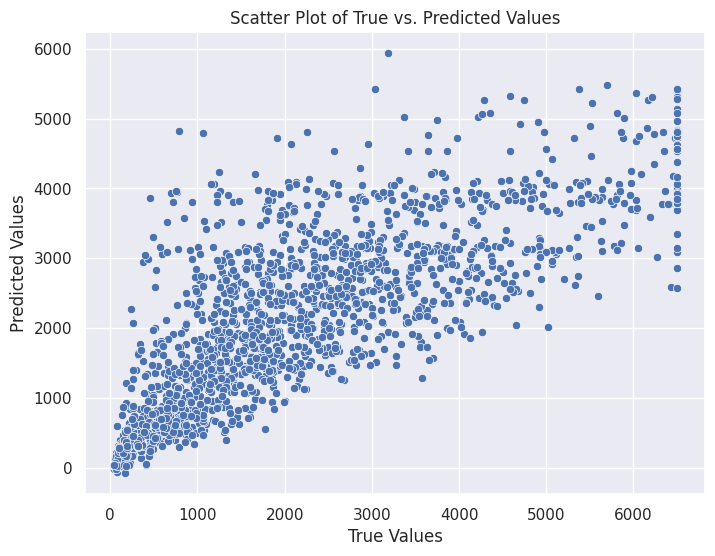

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Instead of a confusion matrix, let's visualize the predictions against the true values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=testing_data_prediction)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of True vs. Predicted Values")
plt.show()

saving the model

In [ ]:
import pickle
filename='Mart_model.sav'
pickle.dump(regressor,open(filename,'wb'))